<a href="https://colab.research.google.com/github/mahaairshad/CE888_si19783/blob/master/Lab7/Lab7_Exercise4_CNN_on_diff_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Normal X-ray v/s X-ray with Pneomonia 

This program implements CNN to identify X-rays with pneumonia.

![alt text](https://glassboxmedicine.files.wordpress.com/2019/03/projectional_rendering_of_ct_scan_of_thorax_thumbnail.gif?w=371)


In [28]:
import os
os.environ['KAGGLE_USERNAME'] = "shahzadimahaairshad" # username from the json file
os.environ['KAGGLE_KEY'] = "6f3ba73e91c8f084ad58268571d65f3c" # key from the json file
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia # api copied from kaggle 

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [29]:
# Upload data
from zipfile import ZipFile

file_name = "/content/chest-xray-pneumonia.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [34]:
train_path='/content/chest_xray/train'
val_path='/content/chest_xray/val'
test_path='/content/chest_xray/test'
train_NORMAL_path='/content/chest_xray/train/NORMAL'
train_PNEUMONIA_path='/content/chest_xray/train/PNEUMONIA'
val_NORMAL_path='/content/chest_xray/val/NORMAL'
val_PNEUMONIA_path='/content/chest_xray/val/PNEUMONIA'
test_NORMAL_path='/content/chest_xray/test/NORMAL'
test_PNEUMONIA_path='/content/chest_xray/test/PNEUMONIA'

print('total training normal xray images:', len(os.listdir(train_NORMAL_path)))
print('total training pneumonia xray images:', len(os.listdir(train_PNEUMONIA_path)))
print('total validation normal xray images:', len(os.listdir(val_NORMAL_path)))
print('total validation pneumonia xray images:', len(os.listdir(val_PNEUMONIA_path)))
print('total test normal xray images:', len(os.listdir(test_NORMAL_path)))
print('total test pneumonia xray images:', len(os.listdir(test_PNEUMONIA_path)))

total training normal xray images: 1341
total training pneumonia xray images: 3875
total validation normal xray images: 8
total validation pneumonia xray images: 8
total test normal xray images: 234
total test pneumonia xray images: 390


In [35]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Using ImageDataGenerator to read images from directories

In [37]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(val_path,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [38]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

Epoch 1/30
100/100 [==============================] - 22s 223ms/step - loss: 0.4974 - acc: 0.7715 - val_loss: 0.9969 - val_acc: 0.6250
Epoch 2/30
100/100 [==============================] - 20s 203ms/step - loss: 0.2765 - acc: 0.8890 - val_loss: 0.4096 - val_acc: 0.8750
Epoch 3/30
100/100 [==============================] - 21s 208ms/step - loss: 0.1830 - acc: 0.9303 - val_loss: 0.5930 - val_acc: 0.7500
Epoch 4/30
100/100 [==============================] - 20s 203ms/step - loss: 0.1298 - acc: 0.9554 - val_loss: 0.3336 - val_acc: 0.9375
Epoch 5/30
100/100 [==============================] - 20s 197ms/step - loss: 0.1358 - acc: 0.9450 - val_loss: 0.5704 - val_acc: 0.7500
Epoch 6/30
100/100 [==============================] - 21s 208ms/step - loss: 0.1230 - acc: 0.9460 - val_loss: 0.4334 - val_acc: 0.8125
Epoch 7/30
100/100 [==============================] - 20s 201ms/step - loss: 0.1058 - acc: 0.9590 - val_loss: 0.4460 - val_acc: 0.8125
Epoch 8/30
100/100 [==============================] - 2

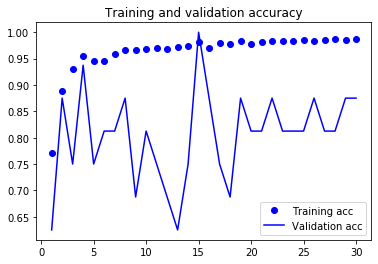

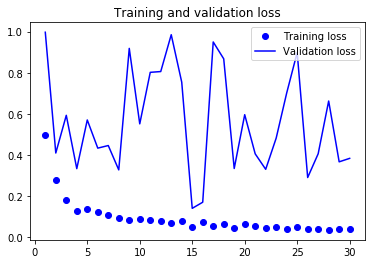

In [39]:
model.save('x_ray.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Convolutional Networks with Dropout

![alt text](https://camo.githubusercontent.com/ee6fa1073247cd2c3d241300caf110d7a7541bc5/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f3830302f312a4972644a355067684439596f4f7956415137334d4a772e676966)

Ref: https://github.com/mneha4/Training-Neural-Nets---Guidelines

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [41]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(val_path,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 29s 286ms/step - loss: 0.6883 - acc: 0.5278 - val_loss: 0.7354 - val_acc: 0.5127
Epoch 2/20
100/100 [==============================] - 26s 259ms/step - loss: 0.6700 - acc: 0.5810 - val_loss: 0.6458 - val_acc: 0.6302
Epoch 3/20
100/100 [==============================] - 26s 261ms/step - loss: 0.6495 - acc: 0.6138 - val_loss: 0.6195 - val_acc: 0.6478
Epoch 4/20
100/100 [==============================] - 26s 260ms/step - loss: 0.6270 - acc: 0.6506 - val_loss: 0.6398 - val_acc: 0.6250
Epoch 5/20
100/100 [==============================] - 25s 248ms/step - loss: 0.6116 - acc: 0.6653 - val_loss: 0.6910 - val_acc: 0.5939
Epoch 6/20
100/100 [==============================] - 28s 279ms/step - loss: 0.6004 - acc: 0.6750 - val_loss: 0.5647 - val_acc: 0.6952
Epoch 7/20
100/100 [==============================] - 26s 259ms/step - loss: 0.5962 - acc: 0.6784 - val_lo